
# Lecture 01-2. OpenCV Overview-2 (Filter, Feature Detection)

### Contents :

   1. Lecture 01 Overview <br>
      1.1. Importing libraries and assigning variables
   2. What are Kernels (2D filter)? <br>
      2.1. Low-Pass Filters <br>
      2.2. High-Pass Filters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.1. The Laplacian Filter <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.2. The Prewitt Filter <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.3. The Horizontal Prewitt Filter <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.4. The Vertical Prewitt Filter

   3. Feature Detection <br>
      3.1. What is a Feature? <br>
      3.2. Feature Matching <br>
      3.3. ORB
  

# 1. Lecture 01 Overview

This lecture aims to explore Filters and Feature Detection using OpenCV.<br>
The intended learning outcomes are:<br>
*   Basic understanding and usage of Kernels and Filters
*   Basic understanding of Feature Detection

## 1.1 Importing libraries and assigning variables

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# QUIZ: Assign "bear.jpg" to the img variable using the materials from the previous lecture, and resize the image to (512,512).
img = cv2.imread("./images/bear.jpg")
img = cv2.resize(img,(512,512))

# OpenCV uses BGR (Blue Green Red) while matplotlib uses RGB (Red Green Blue). Therefore, the channels will be back to front when the OpenCV image is loaded using matplotlib. Therefore, reverse the channel explicitly to maintain original color.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# QUIZ: Convert the image to Grayscale and assign it to the img_gray variable.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. What are Kernels (2D filter)?

The kernel, convolution matrix, or mask is a matrix that imparts effects such as blurring, sharpening, embossing, and edge detection to an image. This is done by performing convolution between the kernel and the image.

Meanwhile, the term "filter" refers to a 3D structure in which several kernels are stacked. In the case of a 2D filter, the filter is the same as the kernel. In other words, the 2D filter, that is, the kernel, has its purpose to create an image that meets the user's purpose by changing the properties of the image through convolution.

Filters are used very often in our daily life. For example, in the video conferencing platform such as Zoom, the user's background can be blurred, which is an example of using the Blur filter. We will practice applying various filters to the image below.

<p align="center">
  <img src='./images/bear.jpg' width=500 />
</p>

## 2.1 Low-Pass Filter

The low-pass filter is also called a blurry filter or smoothing, and has the effect of blurring the image. Mathematically, the sum of all values in the filter is always 1.

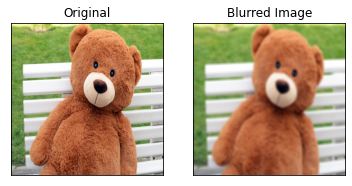

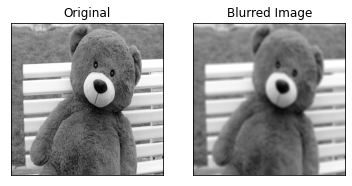

In [2]:
# Blurry Filter, or Low Pass Filter 
# kernel = np.array([[1, 1, 1, 1, 1],
#                   [1, 1, 1, 1, 1],
#                   [1, 1, 1, 1, 1],
#                   [1, 1, 1, 1, 1],
#                   [1, 1, 1, 1, 1]])/25
# kernel = np.ones((5,5))/25
kernel = np.ones((10,10))/100

# Convolving the kernels to the image
dst = cv2.filter2D(img,-1,kernel) 
dst_gray = cv2.filter2D(img_gray,-1,kernel)
 
# Visualizing the original and the blurred image
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Blurred Image')
plt.xticks([]), plt.yticks([])
plt.show()

# Visualizing the grayscale verions of the original and the blurred image
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_gray,cmap="gray"),plt.title('Blurred Image')
plt.xticks([]), plt.yticks([])
plt.show()


## 2.2 High-Pass Filters

Unlike low-pass filters, high-pass filters detect the edges in an image. It amplifies the slope of the edge, and makes the image clear as a whole.

### 2.2.1 The Laplacian Filter

<p align="center">
  <img src='./images/laplacian.jpg' />
</p>

Laplacian filter is an example of a high pass filter, and detects edges in all directions- horizontal and vertical. The Laplacian filter is a filter using the Laplacian function, and the function is visualized as shown in the figure above.

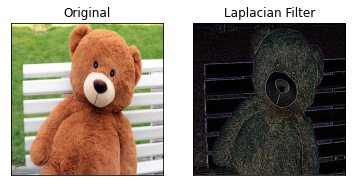

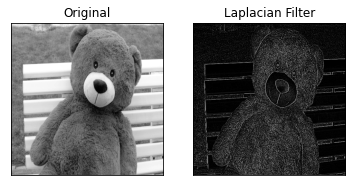

In [3]:
# Amongst the filters below, try to find the most suitable one for our specific case

# 3x3 Negative Laplacian Operator - amplifies the inner edges of the image
# kernel = np.array([ [0,-1,0],
#                     [-1,4,-1],
#                     [0,-1,0]])

# 3x3 Positive Laplacian Operator - amplifies the outer edges of the image
# kernel = np.array([ [0,1,0],
#                     [1,-4,1],
#                     [0,1,0]])

# 3x3 Negative Discrete Laplacian Operator - the output is clearer than the kernels above
# kernel = np.array([ [-1,-1,-1],
#                     [-1,8,-1],
#                     [-1,-1,-1]])

# 3x3 Positive Discrete Laplacian Operator different version - the output is the clearest amongst the above kernels
kernel = np.array([ [1,1,1],
                    [1,-8,1],
                    [1,1,1]])

################################################################################################

# Visualizing the original and the filtered image
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Laplacian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# Visualizing the grayscale versions of the original and the filtered image
dst_gray = cv2.filter2D(img_gray,-1,kernel)
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_gray,cmap="gray"),plt.title('Laplacian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

### 2.2.2 The Prewitt Filter

If the Laplacian Filter is a filter that detects all edges regardless of direction, the Prewitt filter is a filter which detects edges in either vertical and horizontal directions separately. Refer to the Horizontal and Vertical Prewitt Filters below.

<p align="center">
  <img src='./images/prewitt.jpg' />  
</p>

### 2.2.3 The Horizontal Prewitt Filter

The Horizontal Prewitt Filter detects and displays vertical edges on the output image using Vertical Prewitt Operator(Gx).

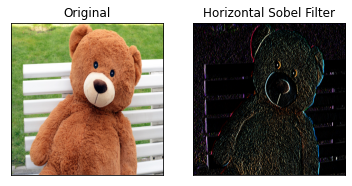

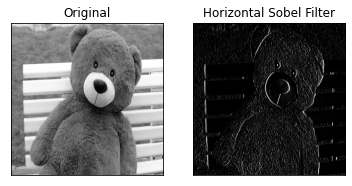

In [5]:
# Horizontal Filter (Gx)
kernel = np.array([ [-1,0,1],
                    [-1,0,1],
                    [-1,0,1]])

################################################################################################

# Visualizing the original and the filtered image
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Horizontal Sobel Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# Visualizing the grayscale versions of the original and the filtered image
dst_gray = cv2.filter2D(img_gray,-1,kernel)
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_gray,cmap="gray"),plt.title('Horizontal Sobel Filter')
plt.xticks([]), plt.yticks([])
plt.show()

### 2.2.4 The Vertical Prewitt Filter

Similarly, the Vertical Prewitt Filter detects and displays horizontal edges on the output image using Horizontal Prewitt Operator(Gy).

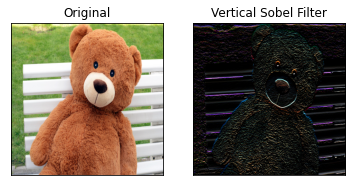

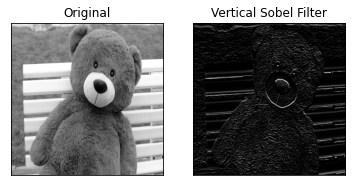

In [6]:
# Vertical Filter (Gy)
kernel = np.array([ [1,1,1],
                    [0,0,0],
                    [-1,-1,-1]])

################################################################################################

# Visualizing the original and the filtered image
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Vertical Sobel Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# Visualizing the grayscale versions of the original and the filtered image
dst_gray = cv2.filter2D(img_gray,-1,kernel)
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_gray,cmap="gray"),plt.title('Vertical Sobel Filter')
plt.xticks([]), plt.yticks([])
plt.show()

So far, we have created a new image by applying filters to an image using OpenCV.

In fact, we can use OpenCV to perform various tasks beyond image filtering, one of which is feature detection. In the following training sessions, let's explore how feature detection can be performed with only the OpenCV library before introducing deep learning.

# 3. Feature Detection 


## 3.1 What is a Feature?

Feature is information that is characteristic to the image such as the corners or vertices of the image. The unique features of the image are called Feature Points or Interest Points, which are points in the image that can be stably extracted in the process of different image variations such as changes in brightness, rotation, and magnification.


<p align="center">
  <img src='./images/featuredetection.jpg' />
</p>

## 3.2 Feature Matching

Feature Matching is the process of establishing a correspondence relationship between two images of the same object. The same object can be matched with the same features between two images regardless of changes in brightness, rotation, or magnification.

<p align="center">
  <img src='./images/featuremapping.jpg' />
</p>

## 3.3 ORB

Amongst the algorithms that allow Feature Detection are SIFT, SURF, and ORB. We will look at ORB specifically, because it works best in various directions and magnifications.

The ORB operation is executed as follows- first, after comparing the intensity of each pixel of the image and the surrounding pixels, if it exceeds a certain limit, the corresponding pixel is designated as a keypoint. When a keypoint is detected, a unique feature is created for each keypoint, and the features are matched between different images of the same object.

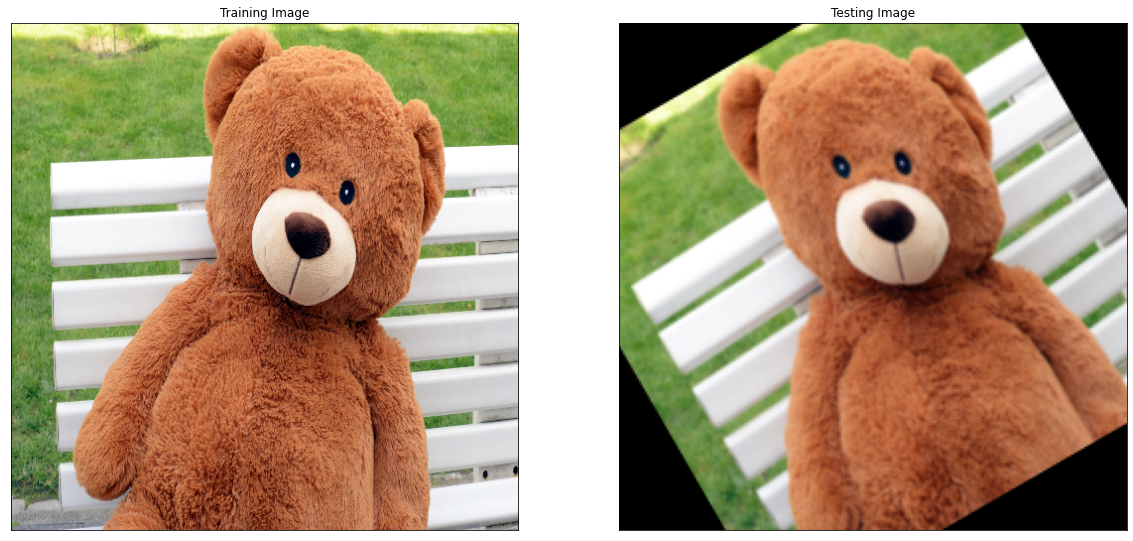

In [7]:
# Gaussian Pyramid to change the image scale
test_image = cv2.pyrDown(img)
# test_image = cv2.pyrDown(test_image)

# Rotating the image
num_rows, num_cols = test_image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

# Visualizing the image
fx, plots = plt.subplots(1, 2, figsize=(20,10))
plt.subplot(121),plt.imshow(img),plt.title('Training Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(test_image),plt.title('Testing Image')
plt.xticks([]), plt.yticks([])
plt.show()


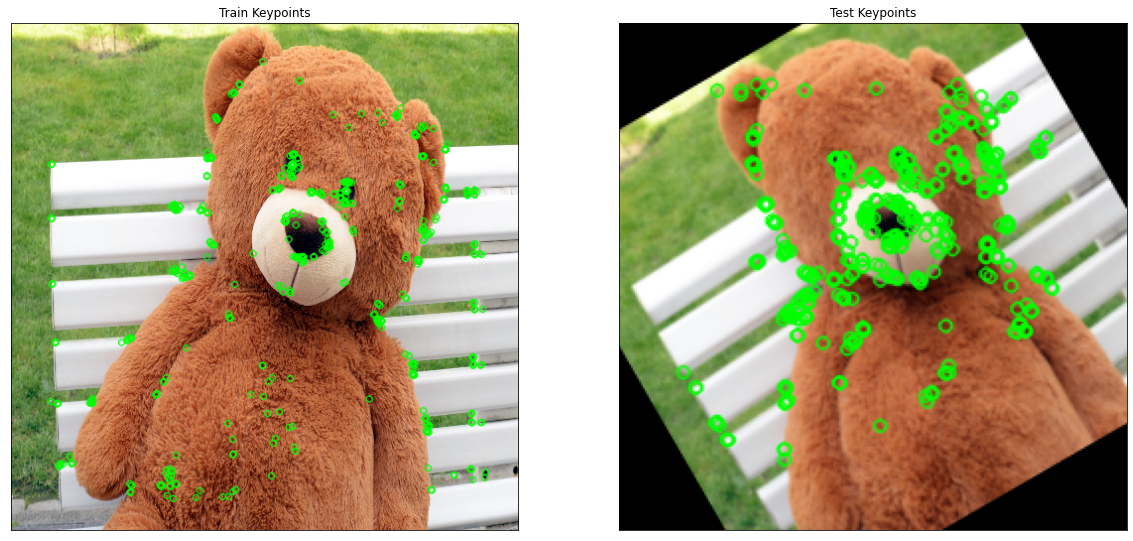

In [8]:
# Executing the OpenCV ORB algorithm to extract Keypoints
orb = cv2.ORB_create()
train_keypoints, train_descriptor = orb.detectAndCompute(img, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_image, None)
keypoints_train = np.copy(img)
keypoints_test = np.copy(test_image)
cv2.drawKeypoints(img, train_keypoints, keypoints_train, color = (0, 255, 0))
cv2.drawKeypoints(test_image, test_keypoints, keypoints_test, color = (0, 255, 0))

# Visualizing Keypoints
fx, plots = plt.subplots(1, 2, figsize=(20,10))
plt.subplot(121),plt.imshow(keypoints_train),plt.title('Train Keypoints')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(keypoints_test),plt.title('Test Keypoints')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Initialize a Brute Force Matcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# Feature matching between the ORB descriptor of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)
result = cv2.drawMatches(img, train_keypoints, test_image, test_keypoints, matches, None, flags=2)

# Visualizing the matching points
plt.figure(figsize=(20,10))
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()